## Treasury Yield Curve dataset

In [1]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tabulate import tabulate
sns.set()

In [2]:
hw5_treasury = pd.read_csv("hw5_treasury yield curve data.csv")
hw5_treasury.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [3]:
# drop the Date column
df = hw5_treasury.drop(['Date'], axis = 1)
df.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [4]:
# Check Na
sum_of_nullValues = np.sum(df.isna().sum() != 0)
if sum_of_nullValues == 0:
    print("There isn't any null values in this data frame")

There isn't any null values in this data frame


In [5]:
print("Number of Rows of Data = ", df.shape[0])
print("Number of Columns of Data = ", df.shape[1])

Number of Rows of Data =  8071
Number of Columns of Data =  31


In [6]:
# Summary Statistics for Attributes and Target
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


Text(0.5, 1.0, 'Probability Plot for Adj_Close(Assuming uniform distribution)')

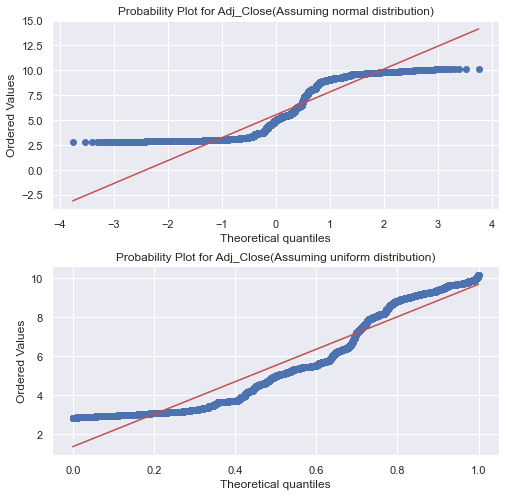

In [7]:
# Generate QQ-Plots for target variable
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.subplot(2, 1, 1)
stats.probplot(df['Adj_Close'],dist = 'norm',plot = plt)
plt.title('Probability Plot for Adj_Close(Assuming normal distribution)')

plt.subplot(2, 1, 2)
stats.probplot(df['Adj_Close'],dist = 'uniform',plot = plt)
plt.title('Probability Plot for Adj_Close(Assuming uniform distribution)')

<Figure size 1008x864 with 0 Axes>

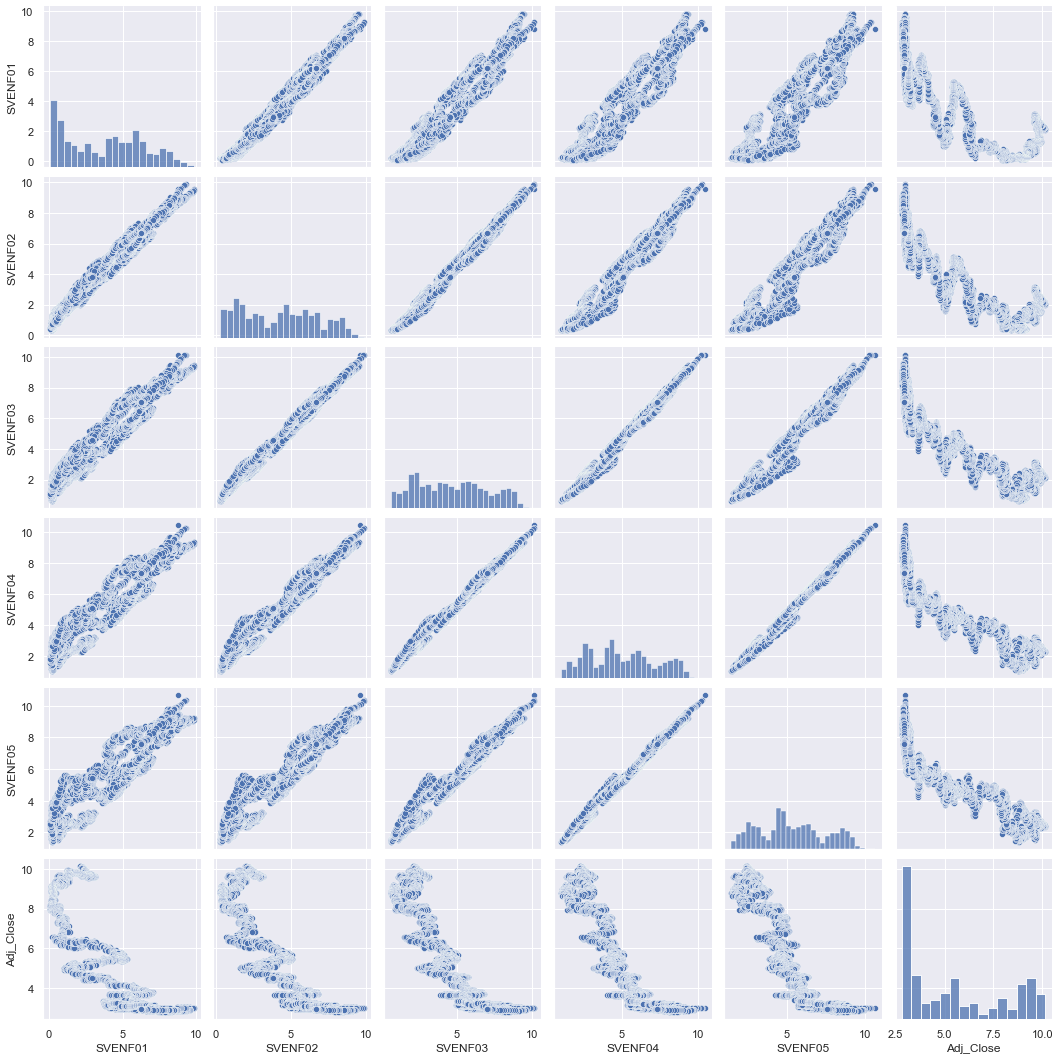

In [8]:
plt.figure(figsize = (14, 12))
sns.pairplot(df[['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'Adj_Close']])
plt.show()

In [9]:
X = df.drop(['Adj_Close'], axis = 1)
y = df['Adj_Close']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6053, 30), (2018, 30), (6053,), (2018,))

In [11]:
# Standardize the features
scalerX = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scalerX.transform(X_train), columns = X.columns.values) 
X_test = pd.DataFrame(scalerX.transform(X_test), columns = X.columns.values) 

scalery = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train = scalery.transform(y_train.values.reshape(-1, 1))
y_test = scalery.transform(y_test.values.reshape(-1, 1))

In [12]:
cov_mat = np.cov(X_train.values.T)
eigen_vals, eigen_vecs = la.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[2.79681089e+01 1.21101006e+00 6.57699740e-01 1.45787360e-01
 1.99556820e-02 2.07460308e-03 2.84451874e-04 3.33704257e-05
 2.60327941e-06 2.03188621e-07 1.43293108e-08 1.13845037e-09
 1.87175731e-10 1.96710123e-10 2.76088775e-10 2.07670251e-10
 2.18416213e-10 2.17806882e-10 2.24981602e-10 2.26604011e-10
 2.30445567e-10 2.62214434e-10 2.38378785e-10 2.41089897e-10
 2.57022474e-10 2.44225090e-10 2.55255465e-10 2.46847059e-10
 2.52558401e-10 2.50914521e-10]


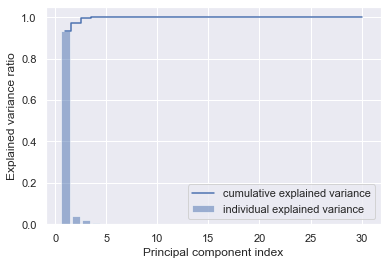

In [13]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
            sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,31), var_exp, alpha=0.5, align='center',
         label='individual explained variance')
plt.step(range(1,31), cum_var_exp, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

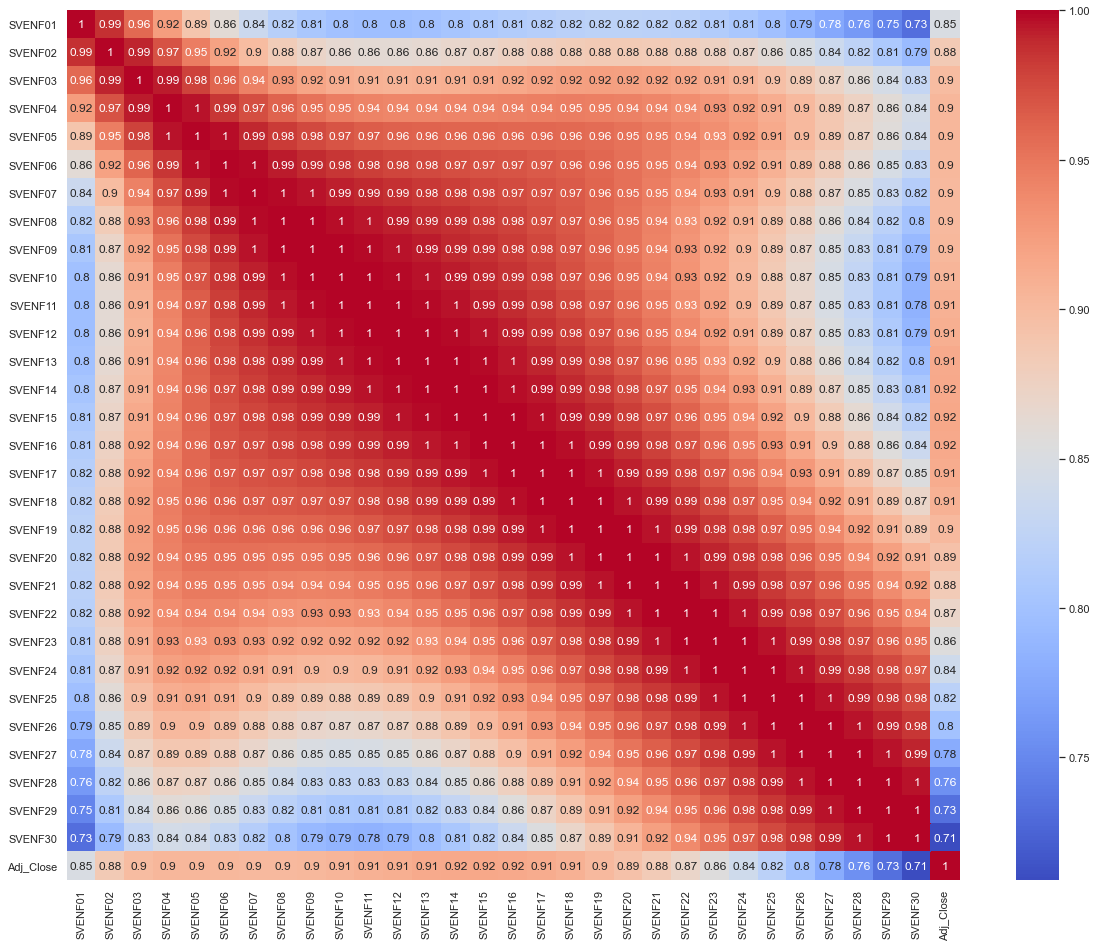

In [14]:
# Plot the absolute value of the corr heatmap
corr_matrix = df.corr().abs()
plt.figure(figsize = (20,16))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

<font color=blue>We can see that selecting a small number of PCs is enough to capture most of the total variance of the original data.</font>

In [15]:
lr = LinearRegression()
lr_cv = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
lr_cv_mse_mean = np.round(np.mean(-lr_cv), 4)
lr_cv_mse_std = np.round(np.std(-lr_cv), 4)
print("The mean MSE of 10-fold cv for linear regression model is ", lr_cv_mse_mean)
print("The standard deviation of 10-fold cv for linear regression model is ", lr_cv_mse_std)

The mean MSE of 10-fold cv for linear regression model is  0.0977
The standard deviation of 10-fold cv for linear regression model is  0.0067


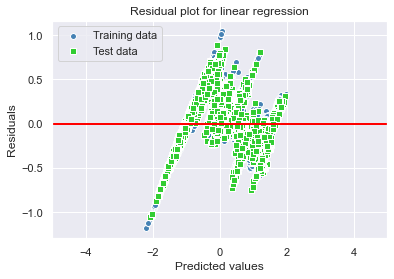

In [16]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
plt.scatter(lr.predict(X_train),  lr.predict(X_train) - y_train,
             c = 'steelblue', marker = 'o', edgecolor = 'white',
             label = 'Training data')
plt.scatter(lr_pred,  lr_pred - y_test,
             c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.title("Residual plot for linear regression")
plt.hlines(y = 0, xmin = -5, xmax = 5, color = 'red', lw = 2)
plt.xlim([-5, 5])
plt.show()

In [17]:
lr_test_mse = np.round(mean_squared_error(y_test, lr.predict(X_test)), 4)
lr_test_r2 = np.round(r2_score(y_test, lr.predict(X_test)), 4)
lr_test_mse, lr_test_r2

(0.1002, 0.8992)

In [18]:
# Using grid search cross validation to select the best alpha
SVM_para = {'kernel':['linear', 'poly', 'rbf'], 'C':[0.1, 0.2, 0.5, 1, 2, 5, 10]}
SVM = SVR()
SVM_cv = GridSearchCV(SVM, SVM_para, scoring = 'r2', cv = 10, n_jobs = -1)
SVM_cv.fit(X_train, y_train.reshape(y_train.shape[0]))

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.5, 1, 2, 5, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='r2')

In [19]:
print('The best training R-Squared score using cv is {}'.format(np.round(SVM_cv.best_score_, 4)))

The best training R-Squared score using cv is 0.9916


In [20]:
print('The best parameters using cv is {}'.format(SVM_cv.best_params_))

The best parameters using cv is {'C': 10, 'kernel': 'rbf'}


In [21]:
SVM = SVR(kernel = 'rbf', C = 10).fit(X_train, y_train.reshape(y_train.shape[0]))
SVM_cv = cross_val_score(SVM, X_train, y_train.reshape(y_train.shape[0]), 
                         scoring = 'neg_mean_squared_error', cv = 10)
SVM_cv_mse_mean = np.round(np.mean(-SVM_cv), 4)
SVM_cv_mse_std = np.round(np.std(-SVM_cv), 4)
print("The mean MSE of 10-fold cv for linear regression model is ", SVM_cv_mse_mean)
print("The standard deviation of 10-fold cv for linear regression model is ", SVM_cv_mse_std)

The mean MSE of 10-fold cv for linear regression model is  0.0084
The standard deviation of 10-fold cv for linear regression model is  0.0008


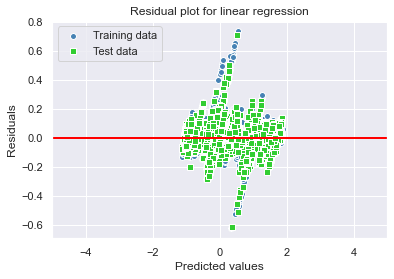

In [22]:
SVM.fit(X_train, y_train.reshape(y_train.shape[0]))
SVM_pred = SVM.predict(X_test)
plt.scatter(SVM.predict(X_train),  SVM.predict(X_train) - y_train.reshape(y_train.shape[0]),
             c = 'steelblue', marker = 'o', edgecolor = 'white',
             label = 'Training data')
plt.scatter(SVM_pred,  SVM_pred - y_test.reshape(y_test.shape[0]),
             c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.title("Residual plot for linear regression")
plt.hlines(y = 0, xmin = -5, xmax = 5, color = 'red', lw = 2)
plt.xlim([-5, 5])
plt.show()

In [23]:
SVM_test_mse = np.round(mean_squared_error(y_test, SVM.predict(X_test)), 4)
SVM_test_r2 = np.round(r2_score(y_test, SVM.predict(X_test)), 4)
SVM_test_mse, SVM_test_r2

(0.0077, 0.9923)

In [24]:
pca = PCA(n_components = 3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [25]:
lr_pca = LinearRegression()
lr_pca_cv = cross_val_score(lr_pca, X_train_pca, y_train, scoring = 'neg_mean_squared_error', cv = 10)
lr_pca_cv_mse_mean = np.round(np.mean(-lr_pca_cv), 4)
lr_pca_cv_mse_std = np.round(np.std(-lr_pca_cv), 4)
print("The mean MSE of 10-fold cv for linear regression model is ", lr_cv_mse_mean)
print("The standard deviation of 10-fold cv for linear regression model is ", lr_cv_mse_std)

The mean MSE of 10-fold cv for linear regression model is  0.0977
The standard deviation of 10-fold cv for linear regression model is  0.0067


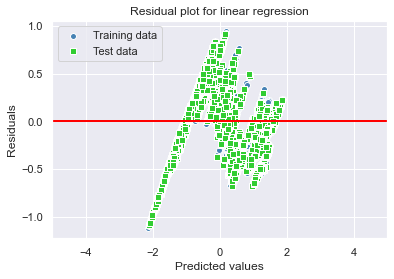

In [26]:
lr_pca.fit(X_train_pca, y_train)
lr_pca_pred = lr_pca.predict(X_test_pca)
plt.scatter(lr_pca.predict(X_train_pca),  lr_pca.predict(X_train_pca) - y_train,
             c = 'steelblue', marker = 'o', edgecolor = 'white',
             label = 'Training data')
plt.scatter(lr_pca_pred,  lr_pca_pred - y_test,
             c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.title("Residual plot for linear regression")
plt.hlines(y = 0, xmin = -5, xmax = 5, color = 'red', lw = 2)
plt.xlim([-5, 5])
plt.show()

In [27]:
lr_pca_test_mse = np.round(mean_squared_error(y_test, lr_pca.predict(X_test_pca)), 4)
lr_pca_test_r2 = np.round(r2_score(y_test, lr_pca.predict(X_test_pca)), 4)
lr_pca_test_mse, lr_test_r2

(0.1386, 0.8992)

In [28]:
# Using grid search cross validation to select the best alpha
SVM_para = {'kernel':['linear', 'poly', 'rbf'], 'C':[0.1, 0.2, 0.5, 1, 2, 5, 10]}
SVM_pca = SVR()
SVM_cv_pca = GridSearchCV(SVM_pca, SVM_para, scoring = 'r2', cv = 10, n_jobs = -1)
SVM_cv_pca.fit(X_train_pca, y_train.reshape(y_train.shape[0]))

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.5, 1, 2, 5, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='r2')

In [29]:
print('The best training R-Squared score using cv is {}'.format(np.round(SVM_cv_pca.best_score_, 4)))

The best training R-Squared score using cv is 0.982


In [30]:
print('The best parameters using cv is {}'.format(SVM_cv_pca.best_params_))

The best parameters using cv is {'C': 10, 'kernel': 'rbf'}


In [31]:
SVM_pca = SVR(kernel = 'rbf', C = 10).fit(X_train_pca, y_train.reshape(y_train.shape[0]))
SVM_cv_pca = cross_val_score(SVM, X_train_pca, y_train.reshape(y_train.shape[0]), 
                         scoring = 'neg_mean_squared_error', cv = 10)
SVM_pca_mse_mean = np.round(np.mean(-SVM_cv_pca), 4)
SVM_pca_mse_std = np.round(np.std(-SVM_cv_pca), 4)
print("The mean MSE of 10-fold cv for linear regression model is ", SVM_pca_mse_mean)
print("The standard deviation of 10-fold cv for linear regression model is ", SVM_pca_mse_std)

The mean MSE of 10-fold cv for linear regression model is  0.018
The standard deviation of 10-fold cv for linear regression model is  0.0022


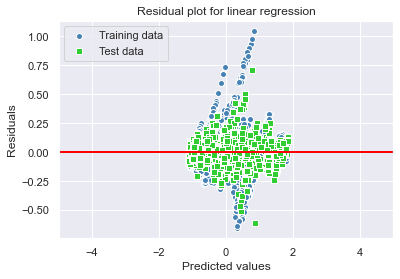

In [32]:
SVM_pca.fit(X_train_pca, y_train.reshape(y_train.shape[0]))
SVM_pca_pred = SVM_pca.predict(X_test_pca)
plt.scatter(SVM_pca.predict(X_train_pca),  SVM_pca.predict(X_train_pca) - y_train.reshape(y_train.shape[0]),
             c = 'steelblue', marker = 'o', edgecolor = 'white',
             label = 'Training data')
plt.scatter(SVM_pca_pred,  SVM_pred - y_test.reshape(y_test.shape[0]),
             c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.title("Residual plot for linear regression")
plt.hlines(y = 0, xmin = -5, xmax = 5, color = 'red', lw = 2)
plt.xlim([-5, 5])
plt.show()

In [33]:
SVM_pca_test_mse = np.round(mean_squared_error(y_test, SVM_pca.predict(X_test_pca)), 4)
SVM_pca_test_r2 = np.round(r2_score(y_test, SVM_pca.predict(X_test_pca)), 4)
SVM_pca_test_mse, SVM_pca_test_r2

(0.0184, 0.9814)

In [34]:
training_MSE_mean = np.array([lr_cv_mse_mean, SVM_cv_mse_mean, lr_pca_cv_mse_mean, SVM_pca_mse_mean])
training_MSE_std = np.array([lr_cv_mse_std, SVM_cv_mse_std, lr_pca_cv_mse_std, SVM_pca_mse_std])
testing_MSE = np.array([lr_test_mse, SVM_test_mse, lr_pca_test_mse, SVM_pca_test_mse])
testing_r2 = np.array([lr_test_mse, SVM_test_r2, lr_pca_test_r2, SVM_pca_test_r2])

model_names = np.array(['Linear Regression', 'SVM', 'Linear Regression with PCA', 'SVM with PCA'])
index = np.array(['training_MSE_mean', 'training_MSE_std', 'testing_MSE', 'testing_r2'])
table = pd.DataFrame(np.vstack((training_MSE_mean, training_MSE_std, testing_MSE, testing_r2)), 
                     index = index, columns = model_names)
table

,Linear Regression,SVM,Linear Regression with PCA,SVM with PCA
training_MSE_mean,0.0977,0.0084,0.1311,0.0180
training_MSE_std,0.0067,0.0008,0.0076,0.0022
testing_MSE,0.1002,0.0077,0.1386,0.0184
testing_r2,0.1002,0.9923,0.8606,0.9814


In [35]:
print("My name is {Jinglun Gao}")
print("My NetID is: {jinglun3}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Jinglun Gao}
My NetID is: {jinglun3}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
